# Sea Level Predictor

### Assignment

You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.

In [169]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('epa-sea-level.csv', parse_dates=['Year'])
df.set_index(keys=['Year'], inplace=True)
df.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880-01-01,0.000000,-0.952756,0.952756,NaN
1881-01-01,0.220472,-0.732283,1.173228,NaN
1882-01-01,-0.440945,-1.346457,0.464567,NaN
1883-01-01,-0.232283,-1.129921,0.665354,NaN
1884-01-01,0.590551,-0.283465,1.464567,NaN


### Scatter plot
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

Text(0.5, 1.0, 'Rise in Sea Level')

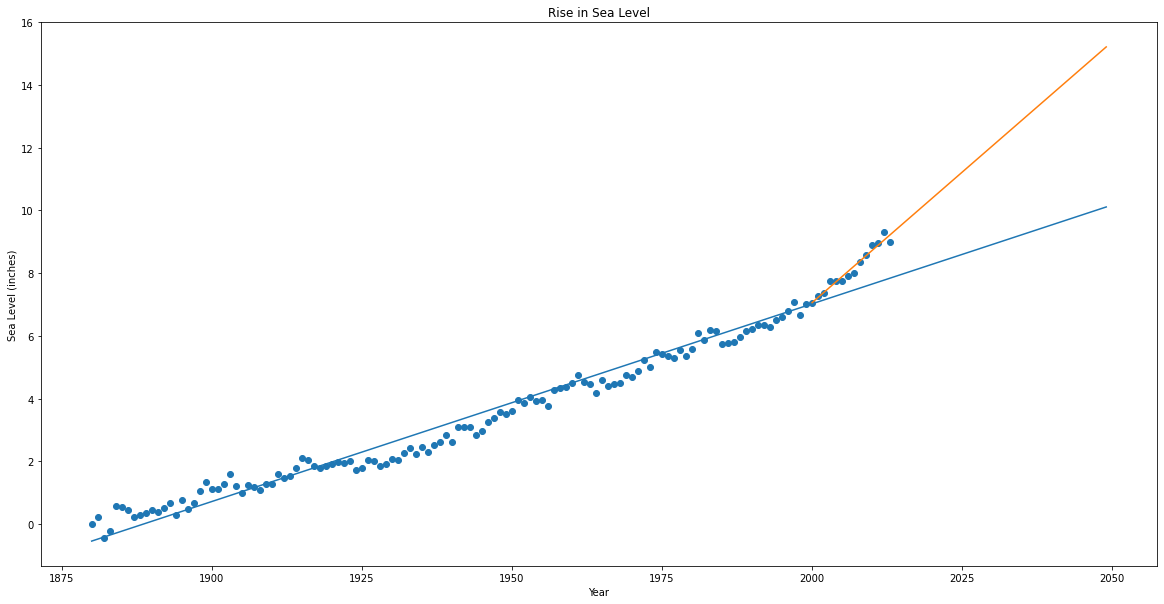

In [179]:
dff = df.copy()
x_sp = dff.index.year
y_sp = dff['CSIRO Adjusted Sea Level']
plt.subplots(figsize=(20,10))
plt.scatter(x=x_sp, y=y_sp)

# Regression linéaire avec stats.linregress
to2050 = np.arange(1880,2050,1) # Pour avoir x jusqu'à 2050, ajout de l'axe avec numpy.arange()

slope, intercept, r_value, p_value, std_err = stats.linregress(x_sp,y_sp)
best_fit= (to2050*slope) + intercept
plt.plot(to2050,best_fit)

# faire une regression sur les valeur apres 2000
df_2000 = df.copy()
df_2000=df_2000[df_2000.index.year>=2000]
x_2000 = df_2000.index.year
y_2000 = df_2000['CSIRO Adjusted Sea Level']

slope, intercept, r_value, p_value, std_err = stats.linregress(x_2000,y_2000)
from2000to2050 = np.arange(2000,2050,1)
best_fit2000=from2000to2050*slope+intercept
plt.plot(from2000to2050,best_fit2000)

# Mise en forme de la visualisation
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')